In [33]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import datetime
from collections import Counter

In [9]:
# DO NOT USE - for array population only
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [10]:
#data = pd.read_csv('data/location_transfer.csv', index_col='PERSON_ID')
data = pd.read_csv('data/location_transfer.csv')

In [11]:
data[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [12]:
dataset = data[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_24561/2822037342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['id'] = pd.Categorical((pd.factorize(data.VISIT_OCCURRENCE_ID)[0]))


In [13]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00.0000000,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00.0000000,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00.0000000,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00.0000000,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00.0000000,VUH EMERGENCY,0
5,232202115,2019-10-30 21:36:00.0000000,VUH EMERGENCY,0
6,232202115,2019-10-30 21:50:00.0000000,VUH 10N TRAUMA,0
7,232202115,2019-10-30 21:50:00.0000000,VUH EMERGENCY,0
8,232202115,2019-10-30 23:59:00.0000000,VUH 10N TRAUMA,0
9,232202115,2019-10-31 23:59:00.0000000,VUH 10N TRAUMA,0


In [14]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [15]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [16]:
edges_df

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
5,VUH 10N TRAUMA,VUH MAIN OR
6,VUH MAIN OR,VUH 10N TRAUMA
7,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA


In [17]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [18]:
edges_weighted = list(Counter(edges).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params = list((x, y, v) for (x,y), v in edges_weighted)
params_df = pd.DataFrame(params, columns = ['from', 'to', 'weight'])

In [19]:
params_df

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,2
1,VUH 10N TRAUMA,VUH EMERGENCY,1
2,VUH 10N TRAUMA,VUH MAIN OR,2
3,VUH MAIN OR,VUH 10N TRAUMA,2
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1


In [20]:
#dataset['ID'] = dataset.index.astype('category').cat.rename_categories(range(0, dataset.index.nunique()+1))
#data['id'] = pd.Categorical((pd.factorize(data.PERSON_ID)[0]))
# site_time = data.iloc[:,0]
# location = data.loc[:,'CARE_SITE_NAME']

In [21]:
# populate graph with columns in dataframe
# i think this does the same thing as 'graph' from above
graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(params_df[:22], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())
# graph_small = nx.from_pandas_drataframe(dataset[:300],source='PERSON_ID',
#                                    target='CARE_SITE_NAME',edge_attr=True,
#                                    create_using=nx.DiGraph())
#graph2 = nx.DiGraph.add_weighted_edges_from(edges_weighted)

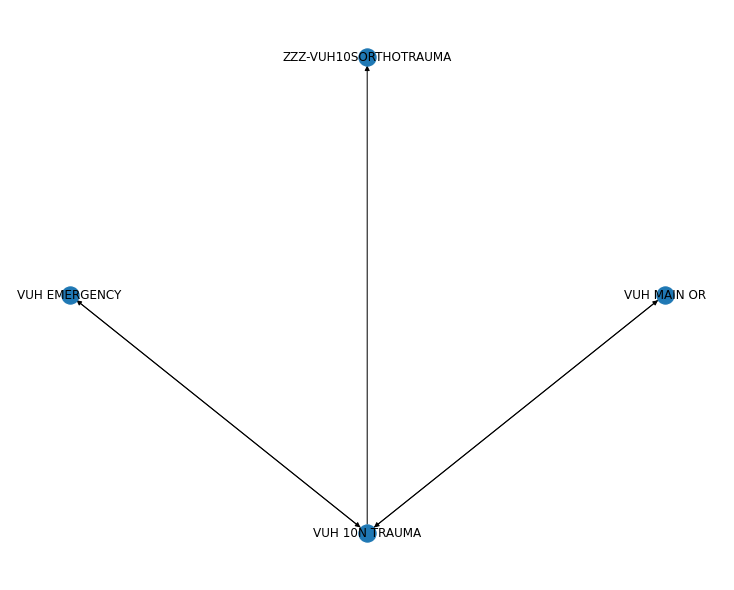

In [22]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph, with_labels=True)

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'labels'

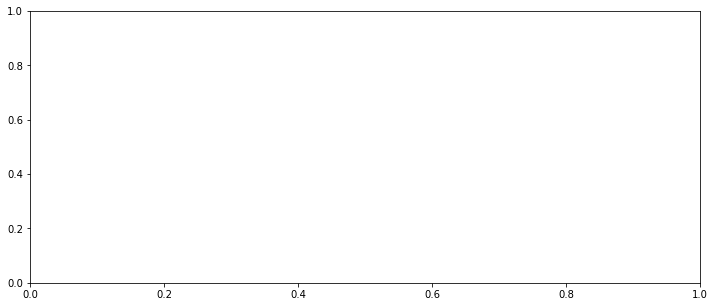

In [23]:
weights = [i['weight'] for i in dict(graph.edges).values()]
labels = [i for i in dict(graph.nodes).keys()]
labels = {i:i for i in dict(graph.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, ax = ax, labels=True)
nx.draw_networkx_edges(graph, pos, width=weights, ax=ax)
_ = nx.draw_networkx_labels(graph, pos, labels, ax=ax)

In [24]:
# connections from a single node
graph['VUH EMERGENCY']

AtlasView({'VUH 10N TRAUMA': {'weight': 2}})

In [25]:
total_connections = {}
for x in graph.nodes:
    total_connections[x] = len(graph[x])
s = pd.Series(total_connections, name='transfers')
df2 = s.to_frame().sort_values('transfers', ascending=False)

In [58]:
df2.head()

,transfers
VUH 10N TRAUMA,3
VUH EMERGENCY,1
VUH MAIN OR,1
ZZZ-VUH10SORTHOTRAUMA,0


In [142]:
data2 = pd.read_csv('data/location_transfer.csv')

In [143]:
data2[:22]

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME
0,5076351,232202115,2019-10-30 01:14:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
1,5076351,232202115,2019-10-30 04:41:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
2,5076351,232202115,2019-10-30 04:47:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
3,5076351,232202115,2019-10-30 09:06:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
4,5076351,232202115,2019-10-30 10:24:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
5,5076351,232202115,2019-10-30 21:36:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
6,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
7,5076351,232202115,2019-10-30 21:50:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,1731232,VUH EMERGENCY
8,5076351,232202115,2019-10-30 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA
9,5076351,232202115,2019-10-31 23:59:00.0000000,2019-10-30 01:14:00.0000000,2019-11-03 13:14:00.0000000,3121012,VUH 10N TRAUMA


In [144]:
data2.dtypes

PERSON_ID                int64
VISIT_OCCURRENCE_ID      int64
CARE_SITE_DATETIME      object
VISIT_START_DATETIME    object
VISIT_END_DATETIME      object
CARE_SITE_ID             int64
CARE_SITE_NAME          object
dtype: object

In [145]:
# day
data2['CARE_SITE_DATETIME'] = data2['CARE_SITE_DATETIME'].astype('datetime64[ns]')
data2['VISIT_START_DATETIME'] = data2['VISIT_START_DATETIME'].astype('datetime64[ns]')
data2['VISIT_END_DATETIME'] = data2['VISIT_END_DATETIME'].astype('datetime64[ns]')

In [146]:
data2.dtypes

PERSON_ID                        int64
VISIT_OCCURRENCE_ID              int64
CARE_SITE_DATETIME      datetime64[ns]
VISIT_START_DATETIME    datetime64[ns]
VISIT_END_DATETIME      datetime64[ns]
CARE_SITE_ID                     int64
CARE_SITE_NAME                  object
dtype: object

In [147]:
data2['DURATION'] = data2['VISIT_END_DATETIME']-data2['VISIT_START_DATETIME']
data2['DURATION_HOURS'] = (data2['DURATION'].dt.total_seconds().astype(int))/3600

In [148]:
data2.drop_duplicates()

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000
...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667


In [149]:
data2['VSTART_YEAR'] = data2['VISIT_START_DATETIME'].dt.year
data2['VSTART_MONTH'] = data2['VISIT_START_DATETIME'].dt.month
data2['VSTART_DATE'] = data2['VISIT_START_DATETIME'].dt.day
data2['VEND_YEAR'] = data2['VISIT_END_DATETIME'].dt.year
data2['VEND_MONTH'] = data2['VISIT_END_DATETIME'].dt.month
data2['VEND_DATE'] = data2['VISIT_END_DATETIME'].dt.day

In [150]:
data2

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


In [157]:
preCovid = data2[data2['VISIT_START_DATETIME'] <= datetime.datetime(2020,3,10)]

In [158]:
postCovid = data2[data2['VISIT_START_DATETIME'] >= datetime.datetime(2020,3,10)]

In [159]:
preCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
0,5076351,232202115,2019-10-30 01:14:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
1,5076351,232202115,2019-10-30 04:41:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
2,5076351,232202115,2019-10-30 04:47:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
3,5076351,232202115,2019-10-30 09:06:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
4,5076351,232202115,2019-10-30 10:24:00,2019-10-30 01:14:00,2019-11-03 13:14:00,1731232,VUH EMERGENCY,4 days 12:00:00,108.000000,2019,10,30,2019,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184635,214444397,94052784,2019-02-07 21:29:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184636,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184637,214444397,94052784,2019-02-07 23:05:00,2019-02-06 19:40:00,2019-02-08 17:12:00,4481006,VUH 6CCT NEURO ICU,1 days 21:32:00,45.533333,2019,2,6,2019,2,8
4184638,214444397,94052784,2019-02-07 23:59:00,2019-02-06 19:40:00,2019-02-08 17:12:00,2991011,ZZZ-VUH10SORTHOTRAUMA,1 days 21:32:00,45.533333,2019,2,6,2019,2,8


In [160]:
postCovid

,PERSON_ID,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,VISIT_START_DATETIME,VISIT_END_DATETIME,CARE_SITE_ID,CARE_SITE_NAME,DURATION,DURATION_HOURS,VSTART_YEAR,VSTART_MONTH,VSTART_DATE,VEND_YEAR,VEND_MONTH,VEND_DATE
209,5076607,319061642,2021-07-28 09:59:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
210,5076607,319061642,2021-07-28 13:00:00,2021-07-28 17:34:00,2021-08-03 16:54:00,25181000,MRI MCE 4,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
211,5076607,319061642,2021-07-28 13:01:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
212,5076607,319061642,2021-07-28 17:33:00,2021-07-28 17:34:00,2021-08-03 16:54:00,241016,ONCOLOGY RADIATION CLINIC PRB B,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
213,5076607,319061642,2021-07-28 17:34:00,2021-07-28 17:34:00,2021-08-03 16:54:00,1731232,VUH EMERGENCY,5 days 23:20:00,143.333333,2021,7,28,2021,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185118,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,1731232,VUH EMERGENCY,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185119,214494611,316363264,2021-09-06 13:43:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185120,214494611,316363264,2021-09-06 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8
4185121,214494611,316363264,2021-09-07 23:59:00,2021-09-06 09:18:00,2021-09-08 12:40:00,4431007,VUH 8CCT MEDICAL ICU,2 days 03:22:00,51.366667,2021,9,6,2021,9,8


## Pre COVID

In [161]:
dataset = preCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(preCovid.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_24561/1723991507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['id'] = pd.Categorical((pd.factorize(preCovid.VISIT_OCCURRENCE_ID)[0]))


In [162]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
0,232202115,2019-10-30 01:14:00,VUH EMERGENCY,0
1,232202115,2019-10-30 04:41:00,VUH EMERGENCY,0
2,232202115,2019-10-30 04:47:00,VUH EMERGENCY,0
3,232202115,2019-10-30 09:06:00,VUH EMERGENCY,0
4,232202115,2019-10-30 10:24:00,VUH EMERGENCY,0
5,232202115,2019-10-30 21:36:00,VUH EMERGENCY,0
6,232202115,2019-10-30 21:50:00,VUH 10N TRAUMA,0
7,232202115,2019-10-30 21:50:00,VUH EMERGENCY,0
8,232202115,2019-10-30 23:59:00,VUH 10N TRAUMA,0
9,232202115,2019-10-31 23:59:00,VUH 10N TRAUMA,0


In [163]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [164]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [165]:
edges_df

,from,to
0,VUH EMERGENCY,VUH 10N TRAUMA
1,VUH 10N TRAUMA,VUH EMERGENCY
2,VUH EMERGENCY,VUH 10N TRAUMA
3,VUH 10N TRAUMA,VUH MAIN OR
4,VUH MAIN OR,VUH 10N TRAUMA
5,VUH 10N TRAUMA,VUH MAIN OR
6,VUH MAIN OR,VUH 10N TRAUMA
7,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA


In [166]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('VUH EMERGENCY', 'VUH 10N TRAUMA', {'weight': 2})
('VUH 10N TRAUMA', 'VUH EMERGENCY', {'weight': 1})
('VUH 10N TRAUMA', 'VUH MAIN OR', {'weight': 2})
('VUH 10N TRAUMA', 'ZZZ-VUH10SORTHOTRAUMA', {'weight': 1})
('VUH MAIN OR', 'VUH 10N TRAUMA', {'weight': 2})


In [167]:
edges_weighted = list(Counter(edges).items())
#params = list((x, y, {'weight':v}) for (x,y), v in edges_weighted)
params = list((x, y, v) for (x,y), v in edges_weighted)
params_df = pd.DataFrame(params, columns = ['from', 'to', 'weight'])

In [168]:
params_df

,from,to,weight
0,VUH EMERGENCY,VUH 10N TRAUMA,2
1,VUH 10N TRAUMA,VUH EMERGENCY,1
2,VUH 10N TRAUMA,VUH MAIN OR,2
3,VUH MAIN OR,VUH 10N TRAUMA,2
4,VUH 10N TRAUMA,ZZZ-VUH10SORTHOTRAUMA,1


In [169]:
graph2 = nx.Graph()
graph2 = nx.from_pandas_edgelist(params_df[:22], source='from', target='to', edge_attr='weight', create_using=nx.DiGraph())

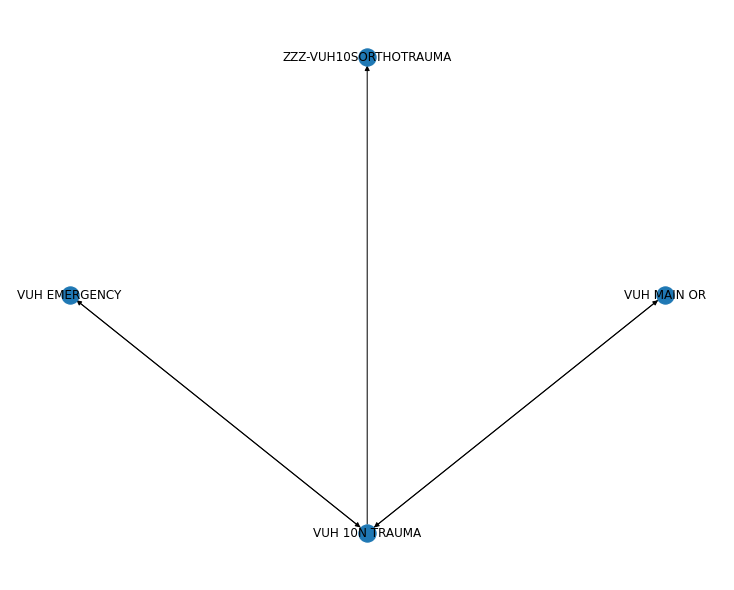

In [170]:
plt.figure(figsize=(10, 8))
nx.draw_shell(graph, with_labels=True)

## COVID

In [171]:
dataset = postCovid[['VISIT_OCCURRENCE_ID', 'CARE_SITE_DATETIME', 'CARE_SITE_NAME']]
dataset['id'] = pd.Categorical((pd.factorize(postCovid.VISIT_OCCURRENCE_ID)[0]))

/var/folders/z1/dhntx3p55px4yc3l3kqz8l2w0000gn/T/ipykernel_24561/3285178806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['id'] = pd.Categorical((pd.factorize(postCovid.VISIT_OCCURRENCE_ID)[0]))


In [172]:
dataset[:22]

,VISIT_OCCURRENCE_ID,CARE_SITE_DATETIME,CARE_SITE_NAME,id
209,319061642,2021-07-28 09:59:00,MRI MCE 4,0
210,319061642,2021-07-28 13:00:00,MRI MCE 4,0
211,319061642,2021-07-28 13:01:00,ONCOLOGY RADIATION CLINIC PRB B,0
212,319061642,2021-07-28 17:33:00,ONCOLOGY RADIATION CLINIC PRB B,0
213,319061642,2021-07-28 17:34:00,VUH EMERGENCY,0
214,319061642,2021-07-28 23:59:00,VUH EMERGENCY,0
215,319061642,2021-07-29 14:34:00,VUH EMERGENCY,0
216,319061642,2021-07-29 23:01:00,VUH EMERGENCY,0
217,319061642,2021-07-29 23:59:00,VUH EMERGENCY,0
218,319061642,2021-07-30 15:12:00,VUH EMERGENCY,0


In [173]:
edges = []
for i in range(1, 22):
    if (dataset.CARE_SITE_NAME.values[i] != dataset.CARE_SITE_NAME.values[i-1]) & (dataset.VISIT_OCCURRENCE_ID.values[i] == dataset.VISIT_OCCURRENCE_ID.values[i-1]):
        edges.append((dataset.CARE_SITE_NAME.values[i-1], dataset.CARE_SITE_NAME.values[i]))

In [174]:
edges_df = pd.DataFrame(edges, columns = ['from', 'to'])

In [175]:
edges_df

,from,to
0,MRI MCE 4,ONCOLOGY RADIATION CLINIC PRB B
1,ONCOLOGY RADIATION CLINIC PRB B,VUH EMERGENCY
2,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
3,VUH 11N HEMATOLOGY / ONCOLOGY,VUH EMERGENCY
4,VUH EMERGENCY,VUH 11N HEMATOLOGY / ONCOLOGY
5,VUH 11N HEMATOLOGY / ONCOLOGY,VUH HOSPITAL LAB
6,VUH HOSPITAL LAB,VUH 11N HEMATOLOGY / ONCOLOGY
7,VUH 11N HEMATOLOGY / ONCOLOGY,VUH HOSPITAL LAB
8,VUH HOSPITAL LAB,VUH 11N HEMATOLOGY / ONCOLOGY


In [176]:
graph = nx.DiGraph((x, y, {'weight': v}) for (x, y), v in Counter(edges).items())
print(*graph.edges(data=True), sep='\n')

('MRI MCE 4', 'ONCOLOGY RADIATION CLINIC PRB B', {'weight': 1})
('ONCOLOGY RADIATION CLINIC PRB B', 'VUH EMERGENCY', {'weight': 1})
('VUH EMERGENCY', 'VUH 11N HEMATOLOGY / ONCOLOGY', {'weight': 2})
('VUH 11N HEMATOLOGY / ONCOLOGY', 'VUH EMERGENCY', {'weight': 1})
('VUH 11N HEMATOLOGY / ONCOLOGY', 'VUH HOSPITAL LAB', {'weight': 2})
('VUH HOSPITAL LAB', 'VUH 11N HEMATOLOGY / ONCOLOGY', {'weight': 2})
